In [1]:
import pandas as pd
df = pd.read_csv('data/raw/iris.csv')
print(df.shape)
print(df.head())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
df['petal_area']=df['petal_length']*df['petal_width']
#filter 
long_petals= df[df['petal_length']> 5.0]
spec = long_petals['species'].value_counts()
spec.name ='Species'
print(long_petals.shape, spec)              

(42, 6) species
virginica     41
versicolor     1
Name: Species, dtype: int64


In [3]:
# select column+filter
filtered =df[['sepal_length', 'species','petal_area']][df['petal_area']>2.0]
print(filtered.head(10))

    sepal_length     species  petal_area
50           7.0  versicolor        6.58
51           6.4  versicolor        6.75
52           6.9  versicolor        7.35
53           5.5  versicolor        5.20
54           6.5  versicolor        6.90
55           5.7  versicolor        5.85
56           6.3  versicolor        7.52
57           4.9  versicolor        3.30
58           6.6  versicolor        5.98
59           5.2  versicolor        5.46


In [4]:
#group by species
stats= df.groupby('species')['petal_area'].agg(['mean','max']).round(2)
print(stats)

             mean    max
species                 
setosa       0.37   0.96
versicolor   5.72   8.64
virginica   11.30  15.87


In [5]:
#intro to numpy
import numpy as np
#column to array
sepal_len_arr = np.array(df['sepal_length'])
print(f"Mean: {sepal_len_arr.mean():.2f}, Std: {sepal_len_arr.std():.2f}")

Mean: 5.84, Std: 0.83


In [6]:
#multiple column
petal_matrix =df[['petal_length', 'petal_width']].values
print(petal_matrix.shape)
print(petal_matrix[:5])

(150, 2)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


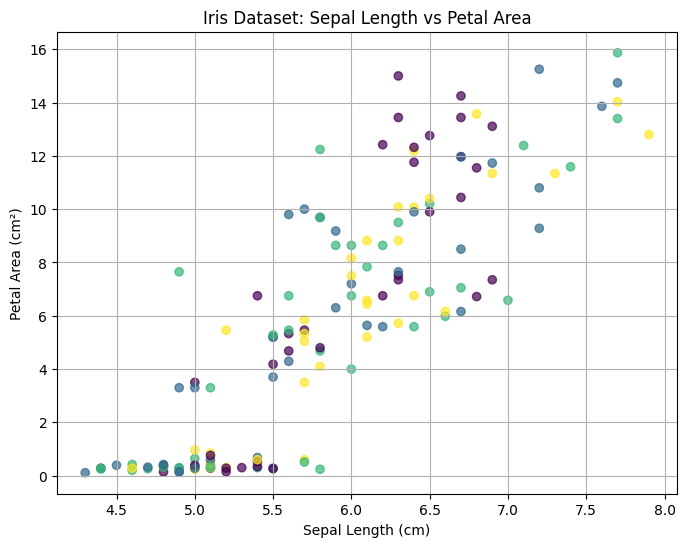

In [7]:
#scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['sepal_length'], df['petal_area'], c= df.index%4, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Area (cm²)')
plt.title('Iris Dataset: Sepal Length vs Petal Area')
plt.grid(True)
plt.show()